# Elementary Probability Notions

## Sample space $\Omega$

> A _sample space_ is a set with elements describing the outcomes of the experiment in which we are interested.

Examples:
* Tossing a coin:
  $\Omega = \{Head, Tail\}$
* Number of bees in Europe: $\Omega = \mathbb{N}$
* Guessing the month when someone is born:
  $\Omega = \{Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec\}$
  
In Python, these can be represented simply as sets.

In [167]:
omega = set(['H', 'T'])
print('Omega:',omega)

Omega: {'T', 'H'}


## Event $A \subseteq \Omega$

> An _event_ is a subset of the sample space.

Examples:
* The certain event: $\Omega$
* The impossible event: $\emptyset$
* Result of a coin toss: $A = \{Head\}$
* Knowing the someone is born in a summer month: $A=\{Jun, Jul, Aug\}$

Since events are sets, we can operate with events using the regular set operations: `union`, `intersection`, `difference`.

In [120]:
A = set([1, 2])
B = set([2, 3])
omega = set([1,2,3,4])
print(A.union(B))        # Or A|B
print(A.intersection(B)) # Or A&B
print(A.difference(B))   # Or A-B

{1, 2, 3}
{2}
{1}


We can visualise these operations with `matplotlib_venn`:

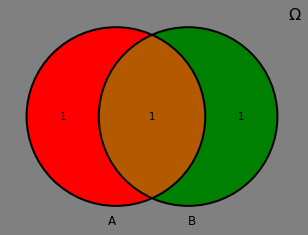

In [134]:
from tools.venn import A, B, omega, plot_venn
plot_venn(omega)

_See: Exercise 1_

Events A and B are called _disjoint_ or _mutually exclusive_ if A and B have no outcomes in common. In set notation: $A \cap B = \emptyset$.

# Probability

> A _probability function_ $P$ on a finite sample space $\Omega$ assigns to  each event $A$ in $\Omega$ a number $P(A)$ in $[0,1]$ such that:
> 1. $P(\Omega)=1$ and
> 1. $P(A \cup B) = P(A)+P(B)$ if $A$ and $B$ are disjoint.

The number $P(A)$ is called the probability that $A$ occurs.

Consequently, for a uniform distribution in a finite space:

$P(A) = \frac{\mbox{#favourable events}}{\mbox{#all events}}$

Useful properties resulting from the definition:
1. $P(\emptyset) = 0$
1. $P(\neg A) = 1-P(A)$
1. $A \subseteq B \Rightarrow P(A) \leq P(B)$
1. $P(A \setminus B) = P(A) - P(A \cap B)$
1. $P(A \cup B) = P(A) + P(B) - P(A \cap B)$

## Example

What is the probability that a die will turn an odd number?

In [163]:
omega = set(range(1,7))
print('Omega:', omega)
A = set(a for a in omega if a % 2 == 0)
print('A:', A)
print('P(A)=', len(A) / len(omega))

Omega: {1, 2, 3, 4, 5, 6}
A: {2, 4, 6}
P(A)= 0.5


# Products of sample spaces

Often in practice, more than one experiment is considered at a time. For instance, if we throw a coin two times, we would have two sample spaces $\Omega_2 = \Omega_1 = \{H, T\}$.

We can treat both trows as a single event with the sample space 

$\Omega = \Omega_1 \times \Omega_2 = \{(H,H), (H,T), (T,H), (T,T)\}$

or generally

$\Omega = \Omega_1 \times \Omega_2 = \{(\omega_1, \omega_2): \omega_1 \in \Omega_1, \omega_2 \in \Omega_2\}$

## Example

What is the probability that by throwing a coin two times we will get tails at least once?

In [168]:
from itertools import product
omega_1=set(['H', 'T'])
omega_2=set(['H', 'T'])
omega=set(product(omega_1, omega_2))
print('Omega:', omega)
A = set(a for a in omega if 'T' in a)
print('A:', A)
print('P(A)=', len(A) / len(omega))

Omega: {('H', 'H'), ('T', 'H'), ('T', 'T'), ('H', 'T')}
A: {('T', 'H'), ('T', 'T'), ('H', 'T')}
P(A)= 0.75


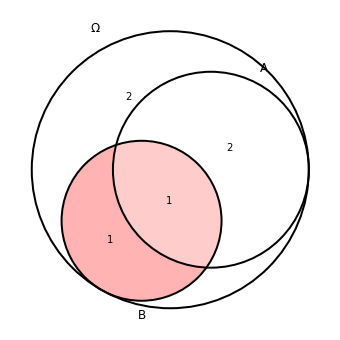

In [72]:
from matplotlib_venn import venn3
set0=set([1,2,3,4,5,6])
set1=set([2, 4, 6])
set2=set([2, 3])
fig = plt.figure(figsize=(6,6))
subsets=[set0, set1, set2]
venn3(subsets = subsets, 
      set_labels=('$\Omega$', 'A', 'B'), 
      set_colors=('w', 'w', 'r'), alpha = 1)
venn3_circles(subsets)
plt.show()

$$
A \in \Omega
$$